In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy 
import cv2

In [ ]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train[0].shape)
x_train,x_test = x_train/255.0,x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step
(28, 28)


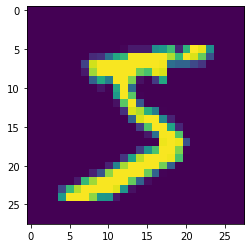

5


In [ ]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
model = keras.Sequential()
# model.add(keras.Input(shape = (28,28)))
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,verbose = 2 ,epochs = 25)
test_loss,test_accuracy = model.evaluate(x_test,y_test)

Epoch 1/25
1875/1875 - 4s - loss: 0.2317 - accuracy: 0.9316
Epoch 2/25
1875/1875 - 4s - loss: 0.0994 - accuracy: 0.9697
Epoch 3/25
1875/1875 - 4s - loss: 0.0716 - accuracy: 0.9776
Epoch 4/25
1875/1875 - 4s - loss: 0.0545 - accuracy: 0.9827
Epoch 5/25
1875/1875 - 4s - loss: 0.0433 - accuracy: 0.9857
Epoch 6/25
1875/1875 - 4s - loss: 0.0344 - accuracy: 0.9885
Epoch 7/25
1875/1875 - 4s - loss: 0.0279 - accuracy: 0.9907
Epoch 8/25
1875/1875 - 5s - loss: 0.0250 - accuracy: 0.9914
Epoch 9/25
1875/1875 - 4s - loss: 0.0207 - accuracy: 0.9929
Epoch 10/25
1875/1875 - 4s - loss: 0.0194 - accuracy: 0.9936
Epoch 11/25
1875/1875 - 4s - loss: 0.0158 - accuracy: 0.9948
Epoch 12/25
1875/1875 - 4s - loss: 0.0157 - accuracy: 0.9948
Epoch 13/25
1875/1875 - 4s - loss: 0.0144 - accuracy: 0.9952
Epoch 14/25
1875/1875 - 4s - loss: 0.0143 - accuracy: 0.9951
Epoch 15/25
1875/1875 - 4s - loss: 0.0134 - accuracy: 0.9952
Epoch 16/25
1875/1875 - 4s - loss: 0.0115 - accuracy: 0.9961
Epoch 17/25
1875/1875 - 4s - loss

In [ ]:
for layer in model.layers :
  layer.trainable = False

model.save('digits')
import os
os.getcwd()

'/content'

In [ ]:
print(x_train.shape)
ans = model.predict(numpy.expand_dims(x_train[0],axis=0))
print(numpy.argmax(ans))

(60000, 28, 28)
5


In [ ]:
from tensorflow.keras.models import load_model
import cv2

image_path = '/content/canvas1.png'
img = cv2.imread(image_path,0)
img = cv2.resize(img,(28,28))
img = numpy.expand_dims(img,axis = 0)
# img = numpy.vstack([img])
print(img.shape)

# model = load_model('digit')

prediction = model.predict(img)

print(numpy.argmax(prediction))

(1, 28, 28)
2


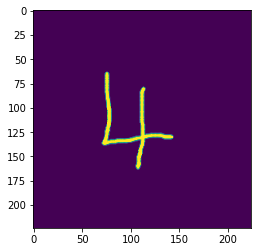

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('digits')
image_path = '/content/canvas1.png'
img = cv2.imread(image_path,0)
img = cv2.bitwise_not(img)
plt.imshow(img)
plt.show()

In [ ]:
img = cv2.resize(img,(28,28))
img = numpy.expand_dims(img,axis = 0)
prediction = model.predict(img)
print(numpy.argmax(prediction))

4
